<a href="https://colab.research.google.com/github/nirmalaraj77/Python/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA MANIPULATION WITH PYTHON**

#**DATA MANIPULATION WITH PANDAS**



In [ ]:
# import libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/walmart.csv')
temperatures = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/temperatures.csv')
avocados = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/avocado.pkl')


##**Transforming DataFrames**

###**DataFrame Information**

* df.head()

* df.info()

* df.shape - method, not function

* df.describe()

* df.values - method, not function

* df.columns - method, not function

* df.index - method, not function

###**Sorting**

* df.sort_values('col1', ascending=False)

* df.sort_values(['col1', 'col2'], ascending=[True, False])

###**Subsetting**

* df[['col1', 'col2]]

* df['col1'] > 100 - Boolean

* df[df['col'] > 100]

* df[df['col'] =="text"]

* df[df['date_of_birth'] > '1999-01-01']

###**Subsetting multiple columns**
* df1 = df['col1'] == 'text'
* df2 = df['col2] < 100
* df [df1 & df2]

* dogs [ (dogs['breed'] == "labrador") & (dogs['color'] == "white") ]

###**Subsetting using .isin()**
* colors=['brown', 'black', 'tan"]
* condition = dogs['color'].isin(colors)
* dogs[condition]

* is_black_or_brown = dogs['color'].isin(["black", "brown"])
* dogs[is_black_or_brown]

###**Add Column**
* df['col_x'] = df['col_y'] / 100


###**Drop Duplicates**

* .drop_duplicates(subset=''col1')

* vet_visits.drop_duplicates(subset=['name', 'breed'])



##**Aggregating DataFrames**

###**Drop Duplicates**

* .drop_duplicates(subset=''col1')

* vet_visits.drop_duplicates(subset=['name', 'breed'])


###**Summary Statistics**

* df['col1'].mean()

* .median()
* .mode()
* .min()
* .max()
* .var()
* .std()
* .sum()
* .quantile()

* df['date'].min()

* dogs[dogs['color'] == "white"]['weight_kg'].mean()

* also - sum(variable)

###**.agg method**

* apply custom functions

* apply functions to more than 1 column

* def pct30(column):<br>
    return column.quantile(0.3)

* def pct40(column):<br>
  return column.quantile(0.4)

* dogs['weight_kg'].agg([pct30, pct40])

* dogs[['weight_kg', 'height__cm']].agg([pct30, np.median])

* dogs['weight_kg'].agg([pct30, np.median])


###**Cumulative Statistics (sort by any dates first)**

* .cumsum()

* .cummax()

* .cummin()

* *cumprod()

###**Counting**

* .value_counts()

* unique_dogs['breed'].value_counts()

* sort = True

* normalize = True - turn counts to proportions of total

###**Grouped summary statistics**

* subset each group - harder and prone to error
* dogs[dogs['color'] == "white"]['weight_kg'].mean()

* .groupby
* dogs.groupby('color')['weight_kg'].mean

* .agg method for multiple statistics
* dogs.groupby('color')['weight_kg'].agg([min, max, sum])

* group by multiple columns and aggregate by multiple columns
* dogs.groupby(['color', 'breed'])['weight_kg'].mean()
* dogs.groupby(['color', 'breed'])[['weight_kg', 'height_cm']].mean()


###**Pivot Table**

* .pivot_table

* values - column you want to summarize

* index - column you want to group by

* default - pivot_table takes the mean value for each group

* aggfunc - different summary statistic

* dogs.pivot_table(values='weight_kg', index='color', aggfunc=np.median)

* multiple statistics - pass function to list
* dogs.pivot_table(values='weight_kg', index='color', aggfunc=[np.median, np.mode])

* columns - additionl variable
* dogs.pivot_table(values='weight_kg', index='color', columns='breed')

* fill_value
dogs.pivot_table(values='weight_kg', index='color', columns='breed', fill_value=0)

* margins=True - mean values for all acolumns and rows (not inclusing filled with 0)
dogs.pivot_table(values='weight_kg', index='color', columns='breed', fill_value=0, margins=True)








In [ ]:
def pct30(column):
  return column.quantile(0.3)

def pct40(column):
  return column.quantile(0.4)

sales[['weekly_sales', 'temperature_c']].agg([pct30, pct40])

,weekly_sales,temperature_c
pct30,5128.481,8.766667
pct40,8327.190,11.522222


In [ ]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))


        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


<ipython-input-3-831a9192476d>:7: FutureWarning: The provided callable <function median at 0x78591a353490> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))
<ipython-input-3-831a9192476d>:7: FutureWarning: The provided callable <function median at 0x78591a353490> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))
<ipython-input-3-831a9192476d>:7: FutureWarning: The provided callable <function median at 0x78591a353490> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the strin

In [ ]:
store_types = sales.drop_duplicates(subset=['store', 'type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store', 'department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset='date')

# Print date col of holiday_dates
print(holiday_dates["date"])

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

##**Slicing and Indexing DataFrames**

###**Set and remove Indexes**

* Set index
* .set_index
* df_ind = df.set_inex('col1')

* remove index
* .reset_index
* df_ind = df.reset_inex()

* drop index
* df.reset_index(drop=True)


###**Subset Index**
* .loc to subset index
* dogs_ind.loc[['Bella', 'Stella']]

* index values does not have to be unique

###**Subset multi-level index**
* hierachical index - pass as list
* inner index is nested inside outer index
* dogs_ind3 = dogs.set_index (['breed', 'color'])
* subset outer level with list
* dogs_ind.loc[['Bella', 'Stella']]
* subset innter level with list of tuples
* dogs_ind.loc[[('labrador', 'brown'), ('chihuahua', 'tan')]]

###**Sort Inxex**
* sort_index() - sorts all indexes from outer to inner

* control sort_index() by passing lists to level and ascending
* dogs_ind3.sort_index(level=['color', 'breed'], ascending =[True, False])

###**Slicing and subsetting with row and column names with .loc**
* slice outer level
* index values in list
* final value is included
* dogs_srt.loc['Chow Chow' : 'Poodle']

* slice inner level
* index values in tuples pairs
* dogs_srt.loc[('Labrador' : 'Brown') : ('Chow Chow' : 'Grey')]

* slice columns
* dogs_srt.loc[:, 'name' : 'height_cm']

* slice rows and columns
* dogs_srt.loc[('Labrador' , 'Brown') : ('Chow Chow' , 'Grey'), 'name' : 'height_cm']

* subset by range of dates
* dogs = dogs.set_index('date_of_birth').sort_index()
* dogs.loc['2014-08-25' : '2016-09-16']

* slice by partial dates
* dogs.loc['2014' : '2016']

###**Slicing and subsetting row and column numbers with .iloc**
* print(dogs.iloc[2:5, 1:4])
* similar to list slicing
* df..iloc[row_licing, column_slicing]

###**Slicing and subsetting Pivot Tables**
* dogs_height_by_breed_vs_color.loc['Chow Chow' : 'Poodle']
* dogs_height_by_breed_vs_color.mean(axis='index') - DEFAULT(accross rows)
* dogs_height_by_breed_vs_color.mean(axis='columns') -  accross columns

###**Note**
* You can access the components of a date (year, month and day) using code of the form dataframe["column"].dt.component. For example, the month component is dataframe["column"].dt.month, and the year component is dataframe["column"].dt.year

* dogs[["height_cm", "weight_kg"]].hist()


###**Missing Values**

* NaN
* df.isna() - Boolean
* df.isna().any()
* df.isna().sum()
* df.isna().sum().plot(kind='bar')
* df.dropna()
* df.fillna(0)


###**Creating DataFrames**

* **From a list of dictionaries**
* Constructed row by row
* list_of_dicts=[{'name': 'Jeyarajah', 'role' : 'father', 'age' : 35}, {'name': 'Rajithra', 'role' : 'mother', 'age' : 41}, {'name': 'Satheekshana', 'role' : 'daughter', 'age' : 20}{'name': 'Harishva', 'role' : 'son', 'age' : 8}]
* family = pd.DataFrame(list_of_dicts)


* **From a dictionary of lists**
* Constructed column by column
* dict-_of_lists={'namee': ['Jeyarajah', 'Rajithra', 'Satheekshana', 'Harishva'], 'role' : ['father', 'mother', 'daughter', 'son'], 'age' : [47,41,20,8]}
* family1 = pd.DataFrame(dict_of_lists)

###**DataFramr to CSV**
* df.to_csv('file_name_and_path')
























In [ ]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

In [ ]:
# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values='avg_temp_c', index=['country', 'city'], columns='year')

# See the result
print(temp_by_country_city_vs_year)

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc["Egypt":"India"]

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi")]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi"), "2005":"2010"]

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

##**Creating and Visualizing DataFrames**

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()


In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

In [ ]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(kind='scatter', x='nb_sold', y='avg_price', title = 'Number of avocados sold vs. average price')

# Show the plot
plt.show()

In [ ]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(bins=20, alpha=0.5)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(bins=20, alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

In [ ]:
import pandas as pd
#  Dataframd from list of dictionaries (row-by-row)
list_of_dicts=[{'name': 'Jeyarajah', 'role' : 'father', 'age' : 47},\
               {'name': 'Rajithra', 'role' : 'mother', 'age' : 41},\
               {'name': 'Satheekshana', 'role' : 'daughter', 'age' : 20},\
                {'name': 'Harishva', 'role' : 'son', 'age' : 8}]

family = pd.DataFrame(list_of_dicts)

print(family)

#  Dataframe from dictionary of lists (column-by-column)

dict_of_lists={'namee': ['Jeyarajah', 'Rajithra', 'Satheekshana', 'Harishva'], \
               'role' : ['father', 'mother', 'daughter', 'son'],\
               'age' : [47,41,20,8]}

family1 = pd.DataFrame(dict_of_lists)

print(family1)

#**RESHAPING DATA WITH PANDAS**

In [ ]:
#  import libraries and datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

obesity = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/obesity.csv')
fifa_players = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/players.csv')
books = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/books.csv')
churn = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/churn.csv')
medallists = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/medallists.csv')

##**Long vs Wide**

####**Long format**
* Each row represents one feature
* Needs a column to identify records of the ame observation
* Multiple records for each observation
* Interested in each characeristic of a player

####**Wide format**
* Each row shows many features of the same observation
* Each feature is represented in a seperate column
* No repeated records
* can contain large number of missing data
* Intereted in each player




##**From long to wide**
* Demonstrate the relationship between columns
* Time series operations with the variables
* Any operation that requires columns to be the unique variable

##**Set index and .transpose()**

In [ ]:
# Change the DataFrame so rows become columns and vice versa
fifa_transpose = fifa_players.set_index('short_name')[['height_cm', 'weight_kg']].transpose()

# Print fifa_transpose
print(fifa_transpose)

short_name  L. Messi  Cristiano Ronaldo  Neymar Jr  J. Oblak  E. Hazard  \
height_cm        170                187        175       188        175   
weight_kg         72                 83         68        87         74   

short_name  K. De Bruyne  M. ter Stegen  V. van Dijk  L. Modrić  M. Salah  \
height_cm            181            187          193        172       175   
weight_kg             70             85           92         66        71   

short_name  ...  M. Gallagher  Huang Jiahui  M. Sagaf  E. Tweed  P. Martin  \
height_cm   ...           178           183       177       180        188   
weight_kg   ...            70            74        70        72         84   

short_name  Shao Shuai  Xiao Mingjie  Zhang Wei  Wang Haijian  Pan Ximing  
height_cm          186           177        186           185         182  
weight_kg           79            66         75            74          78  

[2 rows x 18278 columns]


##**Pivot method**
* Requires the index / column pair to be unique
* Cannot aggregate
* df.pivot()
* Takes three arguments: index, columns, and values
* Index - names of the columns to set as an index in the new pivoted table
* Columns - names of the columns to set as each column in new table
* Values - names of the columns which to populate the new pivoted table
* Will set NaN value if cannot find row and column matching original table
* Extend the pivot method to all column values - omit the values argument
* Missing value - drop row - df.drop(row_index_num, axis=0)




##**Pivot Table Method**

* df.pivot_table()
* Works with multi-level(hierachical) indexes
* Takes three arguments: index, columns, and values
* Index - names of the columns to set as an index in the new pivoted table
* Columns - names of the columns to set as each column in new table
* Values - names of the columns which to populate the new pivoted table
* Will set NaN value if cannot find row and column matching original table
* Extend the pivot method to all column values - omit the values argument
* Missing value - drop row - df.drop(row_index_num, axis=0)
* aggfunc



In [ ]:
# Use pivot table to display maximum age of players by club and nationality
mean_age_fifa = fifa_players.pivot_table(index='nationality',
                                  columns='club',
                                  values='age',
                                  aggfunc='max',
                                  margins=True)

# Print mean_age_fifa
print(mean_age_fifa)

##**From wide to long**
* Perform analytics
* Plot different variables in same graph





##**Melt Method**
* .melt()
* id_vars - names of columns to use as identifier variables
* value_vars - names of columns to melt - can be one column or list
* var_name - name to use for the columns
* value_name - takes the name to use for the column "value"

In [ ]:
# Assign the name number to the new column containing the values
books_ratings = books.melt(id_vars=['title', 'authors', 'publisher'],
                                  value_vars='ratings_count',
                                  var_name='feature',
                                  value_name='number')

# Print books_ratings
print(books_ratings)

                                                  title  \
0                                   The Liberated Bride   
1     Jack Vance: Critical Appreciations and a Bibli...   
2     The Know-It-All: One Man's Humble Quest to Bec...   
3                               The Mistress's Daughter   
4                                   Beauty's Punishment   
...                                                 ...   
6565        What Was She Thinking? [Notes on a Scandal]   
6566  Zolar's Encyclopedia and Dictionary of Dreams:...   
6567  Every Tongue Got to Confess: Negro Folk-tales ...   
6568                                 Novels and Stories   
6569                               The Complete Stories   

                                                authors           publisher  \
0                           A.B. Yehoshua/Hillel Halkin       Mariner Books   
1     A.E. Cunningham/Harlan Ellison/Charles F. Mill...     British Library   
2                                           A.J. Jacob

##**Wide to Long Method**

* pd.wide_to_long()
* Pandas function
* If column names are similar - starts with same names
* stubnames - specify the prefix - how names of wide columns start
* j - how to name columns that contains suffix or end of wide columns
* i - takes column or list of columns to use as unique identifiers (index)
* sep - define seperator in exiting DF column names
* If DF has named index - resulting DF will not keep original index
* Reset index without dropping
* df.reset_index (drop=False, inplace=True)
* Assumes prefix is followed by nuneric suffix
* sep = '_' - indicates there is a separator
* suffix ='\w+' - indicates suffix is a word
* NaN if no values for a particulkar prefix-suffix combination
<br>
* **Reshape wide to long using title and authors as index and version as new name, and prefix and isbn as wide column prefixes**
<br>
* all_long = pd.wide_to_long(golden_age,
  stubnames=['isbn', 'prefix'],
  i=['title', 'authors'],
  j='version'
  sep='_'
  suffix='\w+')







##**String Columns**

* str attribute in Pandas

###**Split Columns**
* .split() method
* string - The civil war : Vol 1
* split string - books['title'].str.split(':')
* returns a list for each row - ['The civil war', 'Vol 1']

* .str.get method
* get only specific elements from .split by passing index
* books['title'].str.split(':').str.get(0)

* expand = True
* returns multiple columns for split element - not lists
* books['title'].str.split(':', expamnd=True)
* assign 2
* books[['main_title', 'subtitle']] = books['title'].str.split(':', expand=True)

###**Concatenate Columns**
* .cat() method
* books['name_author'].str.cat(books['lastname_author'], sep = ' ')

###**Split and Concatenate Indexes**
* same as columns
* comics_marvel.index = comics_marvel.index.str.cat(comics_marvel['subtitle'], sep = '-')
* comics_marvel.index = comics_marvel.index.str.split('-', expand = True)

###**Concatenate Series**
* new_list = ['qqq', 'www', 'eee']
* books_new['name_author'].str.cat(new_list, sep='-')



##**Stacking DataFrames**

###**Set MultiIndex**
* set_index()
* df.set_index(['aaa', 'bbb'], inplace = True)


###**Set MultiIndex with Array**
* new_array = [['yes', 'no', 'yes'], ['no', 'no', 'yes']]
* each element is an index column
* pd.MultiIndex.from_arrays(new_array, names=['aaa', 'bbb'])


###**Set MultiIndex DataFrame (rows and columns)**










###**Stack Method**
* .stack() method
* reshape DataFrame multi-level index by converting it into stacked form
* rearranges innermost column index to become the innermost row index
* stack into a series
* level = 0 - choose which level to stack by column index
* level = 'col' - choose which levekl to stack by column name



In [ ]:
churn_4 = churn.iloc[:4, :]

# Predefined list to use as index
new_index = [['California', 'California', 'New York', 'Ohio'],
             ['Los Angeles', 'San Francisco', 'New York', 'Cleveland']]

# Create a multi-level index using predefined new_index
churn_new = pd.MultiIndex.from_arrays(new_index, names=['state', 'city'])

# Assign the new index to the churn index
churn_4.index = churn_new

# Print churn_4
print(churn_4)

# Reshape by stacking churn DataFrame
churn_stack = churn_4.stack()

# Print churn
print(churn_stack)

                         State  Account length  Area code International plan  \
state      city                                                                
California Los Angeles      LA             117        408                 No   
           San Francisco    IN              65        415                 No   
New York   New York         NY             161        415                 No   
Ohio       Cleveland        SC             111        415                 No   

                         Voice mail plan  Number vmail messages  \
state      city                                                   
California Los Angeles                No                      0   
           San Francisco              No                      0   
New York   New York                   No                      0   
Ohio       Cleveland                  No                      0   

                          Total day minutes  Total day calls  \
state      city                                     

##**Unstack DataFrame**

* df.unstack()
* rearranges innermost row index to become the innermost column index
* control with level
* chain stack and unstack

##**Swap Levels**

* df.swaplevel()
* chain with stack and unstack
* axis=1 - columns
* atack / unstack MultiIndex - pass as list



##**Handle Missing Data**

* unstacking - NaN when subgroups do not have same set of labels
* fill_value =
* stacking - NaN when combination of index and column vlues are missing in original DataFrame
* .stack() - dropna=True by defaukt - set to False
* fill missing with .fillna()





##**Stacking and Summary Statistics**

* sales.stack().sum(axis=1).unstack()
* sales.unstack(level=1).mean(axis=1)
* sales['office_supply'].unstack(level='country').diff(axis=1, periods=2)* sales.stack().groupby(level='shop').sum()
* sales.groupby(level=1).median().stack(level=[0 ,1]).unstack(level='year')




##**Transforming a List-like Column**

* columns containing values in a list
* transform to seperate columns
* df.explode()
* explode columns with list data
* cities_explode = cities['zip_code'].explode()
* get data back into DF
* cities[['city', 'country']].merge(cities_explode, left_index=True, right_index=True)
* will replicate index

###**Faster Way**
* explode whole DF
* cities_explode = cities.explode('zip_code')
* will replicate index
* to get DF with unique indexes
* cities_explode.reset_index(drop=True, inplace=True)

###**Chaining operations for Comma Seperated Strings**
* .assign - assigns values to columns
* cities.assign(zip_code = cities['zip_code'].str.split(',')).explode('zip_code')



In [ ]:
# Transform the list-like column named bounds
obesity_explode = obesity.explode('bounds')

# Modify obesity_explode by resetting the index
obesity_explode.reset_index(drop=True, inplace=True)

# Print obesity_explode
print(obesity_explode)

     country  perc_obesity        bounds
0  Argentina          21.5  [15.4, 31.5]
1    Germany          22.3  [16.2, 32.4]
2      Japan           2.5    [1.1, 3.5]
3     Norway          23.0  [13.1, 33.0]


##**Nested DF in JSON**

* JavaScript Object Notation

* from pandas import json_normalize

* sep parameter

* record path parameter - key path to each individual observation

* meta parameter - what data to include from rest of Json





In [ ]:
import pandas as pd
from pandas import json_normalize

writers = [
		{'first': 'mary',
		 'last' : 'shelly',
		'books' : {'title': 'Frankenstein', 'year': 1818}
		},
		{'first': 'jane',
		 'last' : 'austen',
		'books' : {'title': 'Pride and Prejudice', 'year': 1811}
		},
		{'first': 'john',
		 'last' : 'tolkien',
		'books' : {'title': 'The Hobbit', 'year': 1937}
		}
  	]

writers_norm = json_normalize(writers, sep='_')
print(writers_norm)

pd.wide_to_long(writers_norm, stubnames='books', i=['first', 'last'], j='feature', sep='_', suffix ='\w+')

  first     last          books_title  books_year
0  mary   shelly         Frankenstein        1818
1  jane   austen  Pride and Prejudice        1811
2  john  tolkien           The Hobbit        1937


books
first last    feature                     
mary  shelly  title           Frankenstein
              year                    1818
jane  austen  title    Pride and Prejudice
              year                    1811
john  tolkien title             The Hobbit
              year                    1937

In [ ]:
writers =  [
		{'first': 'mary',
		 'last' : 'shelly',
		'books' : [{'title': 'Frankenstein', 'year': 1818},
                   {'title': 'The Count of Monte Cristo', 'year': 1844},
                   {'title': 'Wuthering Heights', 'year': 1847}]},

		{'first': 'jane',
		 'last' : 'austen',
		'books' : [{'title': 'Pride and Prejudice', 'year': 1811},
                   {'title': 'Emma', 'year': 1815},
                   {'title': 'Persuasion', 'year': 1817}]},

		{'first': 'john',
		 'last' : 'tolkien',
		'books' : [{'title': 'The Hobbit', 'year': 1937},
                   {'title': 'The Lord of the Rings', 'year': 1954},
                   {'title': 'The Silmarillion', 'year': 1977}]}
		  	]

print(json_normalize(writers, record_path='books', meta=['first', 'last']))

                       title  year first     last
0               Frankenstein  1818  mary   shelly
1  The Count of Monte Cristo  1844  mary   shelly
2          Wuthering Heights  1847  mary   shelly
3        Pride and Prejudice  1811  jane   austen
4                       Emma  1815  jane   austen
5                 Persuasion  1817  jane   austen
6                 The Hobbit  1937  john  tolkien
7      The Lord of the Rings  1954  john  tolkien
8           The Silmarillion  1977  john  tolkien


##**Nested Data Columns**

* import json

* load books to dictionary

* .apply(json.loads) - will convert JSON string to Python dictionary

* .apply(pd.Series) - will convert dictionary to series object

* drop nested data and concatenate with DF

OR

* load to list after json.loads

* json.dumps function to to transform JSON object to string

* read_json function to read string to DF

* concat with writers



In [ ]:
writers = ["Mary Shelly", "Ernest Hemingway"]

books = ['{"title": "Frankenstein", "year": 1818}',
	'{"title": "The Old Man and the Sea", "year": 1951}']

collection = pd.DataFrame(dict(writers=writers, books=books))
print(collection)

import json

books = collection['books'].apply(json.loads).apply(pd.Series)
print(books)

collection = collection.drop(columns='books')
pd.concat([collection, books], axis=1)




            writers                                              books
0       Mary Shelly            {"title": "Frankenstein", "year": 1818}
1  Ernest Hemingway  {"title": "The Old Man and the Sea", "year": 1...
                     title  year
0             Frankenstein  1818
1  The Old Man and the Sea  1951


,writers,title,year
0,Mary Shelly,Frankenstein,1818
1,Ernest Hemingway,The Old Man and the Sea,1951


In [ ]:
writers = ["Mary Shelly", "Ernest Hemingway"]

books = ['{"title": "Frankenstein", "year": 1818}',
	'{"title": "The Old Man and the Sea", "year": 1951}']

collection = pd.DataFrame(dict(writers=writers, books=books))
print(collection)

import json

books = collection['books'].apply(json.loads).to_list()

books_dump = json.dumps(books)

new_books = pd.read_json(books_dump)
print(new_books)

pd.concat([collection['writers'], new_books], axis = 1)


            writers                                              books
0       Mary Shelly            {"title": "Frankenstein", "year": 1818}
1  Ernest Hemingway  {"title": "The Old Man and the Sea", "year": 1...
                     title  year
0             Frankenstein  1818
1  The Old Man and the Sea  1951


<ipython-input-48-d38b9b3c60b4>:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_books = pd.read_json(books_dump)


,writers,title,year
0,Mary Shelly,Frankenstein,1818
1,Ernest Hemingway,The Old Man and the Sea,1951


#**JOINING DATA WITH PANDAS**

In [ ]:
# Import libraries and datasets

import pandas as pd

census = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/census.p')

wards = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/ward.p')

licenses = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/licenses.p')

biz_owners = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/business_owners.p')

cal = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/calendar.p')

ridership = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/ridership.p')

stations = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/stations.p')

zip_demo = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/zip_demo.p')

land_use = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/land_use.p')

actors = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/actors_movies.csv.xls')

movies = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/movies.p')

taglines = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/taglines.p')

financials = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/financials.p')

movie_to_genres = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/movie_to_genres.p')

crews = pd.read_pickle('https://raw.githubusercontent.com/nirmalaraj77/datasets/main/crews.p')

gdp = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/2aa0493ec6cc102715dbfc5fdcdf64c576049b2c/WorldBank_GDP.csv.xls')

sp500 = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/2aa0493ec6cc102715dbfc5fdcdf64c576049b2c/S&P500.csv.xls')

pop = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/2aa0493ec6cc102715dbfc5fdcdf64c576049b2c/WorldBank_POP.csv.xls')

##**Notes**

* df.shape

* df.columns

* df['column'].value_counts

* df[['column']].head()

* pd.read_pickle

* \ line continuation as single line

* group by column and aggregate - grouped_df = df.groupby('column1').agg({'column2':'count'})

* group by column and sum - grouped_df = df.groupby('column1').sum

* count null - .isnull() method to return Boolean index if column is null and .sum() method to count Boolean index for number of True values - number_of_missing_df = df['col'].isnull().sum()

* group multiple df columns - enter as list to .groupby() method

* sort desending
* sorted_df = df.sort_values('columns', ascending=False)

* sort multiple df columns -  enter as list to .sort_values() method

* ascending argument accepts a list of Booleans

* if joining on different column names - left_on = 'col1', right_on = 'col2'

* **Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) |
     (iron_1_and_2['name_2'].isnull()))**

* set index - pd.read_csv(csv_file, index_col=['col1', 'col2'])

* when sub-selecting the columns, input the desired columns as a list - new_df = df[['col1', 'col2', 'col3']]

* Using .isin() filter - popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

* add column to df - df['new_column_name'] = 'some operation'

* pivot_table() method expects inputs arguments in the order of values, index, and columns

* Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

* .plot() accepts a list for its x and y argumens


##**Inner Joins**

* Merge on common column name

* only returns matching values in both tables

* columns in 1st table comes first

* _x and _y - generated if common columns exist

* suffixes = argumnent to control _x and _y naming


In [ ]:
# Print shapes (number of rows and columns) and column names
print('wards: ' , wards.shape , wards.columns)
print('census: ' , census.shape, census.columns)

wards:  (50, 4) Index(['ward', 'alderman', 'address', 'zip'], dtype='object')
census:  (50, 6) Index(['ward', 'pop_2000', 'pop_2010', 'change', 'address', 'zip'], dtype='object')


In [ ]:
# Merge wards and census with suffixes
wards_census = wards.merge(census, on='ward', suffixes = ('_ward', '_census'))

print(wards_census.shape)
print (wards_census.columns)

(50, 9)
Index(['ward', 'alderman', 'address_ward', 'zip_ward', 'pop_2000', 'pop_2010',
       'change', 'address_census', 'zip_census'],
      dtype='object')


In [ ]:
# Count value of the change column
print(wards_census['change'].value_counts())

change
-8%     4
-6%     4
-4%     4
-5%     3
3%      3
-17%    2
-13%    2
-11%    2
-14%    2
-3%     2
0%      2
6%      2
-24%    2
5%      2
-33%    1
-20%    1
1%      1
-9%     1
-10%    1
-16%    1
8%      1
-1%     1
-7%     1
12%     1
31%     1
-15%    1
-18%    1
-2%     1
Name: count, dtype: int64


##**One-to-Many Relationships**

* every row in left table is related to one or more in right table

* resulting table has many rows from left table matching each value in right table



In [ ]:
# Merge wards with lecenses

wards_licenses = wards.merge(licenses, on='ward')

print(wards_licenses.shape)
print(wards_licenses.head(10))

(10000, 9)
  ward            alderman                  address_x  zip_x account  aid  \
0    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   12024  NaN   
1    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   14446  743   
2    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   14624  775   
3    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   14987  NaN   
4    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   15642  814   
5    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   16004  NaN   
6    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   16497  638   
7    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   16547  763   
8    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   16662  763   
9    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE  60647   16899  775   

                   business                   address_y  zip_y  
0       DIGILOG ELECTRONICS          1038 N ASHLAND AVE  60622  
1          

In [ ]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


##**Merging Multiple DataFrames**

* df1.merge(df2, on =['col', 'col'].merge(df2, on='col').merge(df3, on='col')...

* use \ python line continuation..




In [ ]:
# Find the total rides through Wilson Station in July 2019 in weekdays

# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7)
                   & (ridership_cal_stations['day_type'] == 'Weekday')
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print ('Total rides through Wilson Station in July 2019 in weekdays were : '\
 ,(ridership_cal_stations.loc[filter_criteria, 'rides'].sum()))



Total rides through Wilson Station in July 2019 in weekdays were :  140005


In [ ]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'],
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'],
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


##**Left Join**

* all rows from left table and only matching rows from right table

* null values created for non-matches

* how = 'left'

* .isnull() method to return Boolean index if column is null

* .sum() method to count Boolean index for number of True values

* number_of_missing_df = df['col'].isnull().sum()

* one-to-many - if rows in left table match multiple rows in right table - all of those rows will be returned

. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.



In [ ]:
# Left join movies and taglines

movies_taglines = movies.merge(taglines, on='id', how='left')

print(movies_taglines.head())

      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   
3   9672              Infamous    3.680896   2006-11-16   
4  12819       Alpha and Omega   12.300789   2010-09-17   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure  


In [ ]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)



1574


##**Right Join**
 * all rows from right table and only matching rows from left table

 * mirror opposite of left join

 * how = 'right'

##**Outer Join**

* all rows returned from both tables

* null results when no match

* how = 'outer'

##**Self Join - Merging a Table to Itself**

* Same as other joins




In [ ]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


##**Merging on Indexes**

* same as other joins

* index columns will be returned as index

* new_df = df1.merge(df2, left_on='df1_index', left_index=True, right_on='df2_index', right_index=True)

##**Filtering Joins**

* filter observations from one table based on whether or not they match an observation in another table

###**Semi Join**

* returns intersection - similar to inner join

* return only columns from left table - NOT from right table

* no deuplicate rows even if there is a one-to-many relationship

* .isin  - returns Boolean

* 1st step - inner join tables
* genres_tracks = genres.merge(top_tracks, on = 'gid')

* 2nd step - code to compare every gid in genres table to gid in genres_track table and return boolean with .isin
genres['gid'].isin(genres_tracks['gid'])

* 3rd step - subset top_genres with boolean resulet and combine
* genres_tracks = genres.merge(top_tracks, on = 'gid')
* top_genres = genres[genres['gid'].isin(genres_tracks['gid'])]

##**Anti Join**

* returns observations in left table not in the right table

* return only columns from left table - NOT from right table

* 1st step - left join tables, set indicator = True

* indicator = True adds column called _merge (both, left only)

* genres_tracks = genres.merge(top_tracks, on='gid', how='left', indicator=True)

* 2nd step - use the loc accessor and _merge column to select rows only in left table

gid_list = genres_tracks.loc[genres_tracks['_merge] == 'left only', 'gid']

* 3rd step - use isin to filter rows

non_top_genres = genres[genres['gid'].isin(gid_list)]













##**Concatenate Dataframes Vertically**

* pandas.concat()

* axis=0, vertical

* ignore_index=True if index has no valuable information - index 0 to n-1

* pd.concat ([table1, table2, table3], ignore_index=True)

###**Set labels to original tables**

* ignore_index=False - keys argument

* results in multi-index table with label on 1st level

* pd.concat ([table1, table2, table3], ignore_index=False, keys=[table1, table2, table3])

###**Concatenate tables with different column names**

* include all columns in different tables

* sort argument will alphabetically sort

* pd.concat ([table1, table2, table3], sort=True)

* set join='inner' for only matching columns from different tables

* default is 'outer'

* sort has no effect when join='inner'

* pd.concat ([table1, table2, table3], join='inner')




##**Validate and Verify**

* columns may have duplicate data

* unintentional one-to-many relationship

* unintentional many-to-many relationship

###**Validate Merge**

* .merge(validate=None) - default

* 'one_to_one'

* 'one_to_many'

* 'many_to_one'

* 'many_to_many'

* raises merge error

###**Verify Concatenate**

* only checks index

* .concat(verify_integrity=False) - default

* verify_integrity= True - raises value error














##**merge_ordered()**

* merge time-series and other ordered data

* results are similar to standard merge method

* default is outer join

* results are sorted

* pd.merge_ordered(df1, df2)

* fill missing value with previous value - * forward fill

* fill_method='ffill'

* order is important when merging on more than 1 column





In [ ]:
# Use merge_ordered() to merge gdp and sp500, and forward fill missing values
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date',
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP', 'Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


##**merge_asof()**

* similar to merge_ordered left join

* match nearest less than or equal value - not exact matches

* merged 'on' columns must be sorted

* pd.merge_asof(df1, df2)

* direction='backward' - default

* direction='forward' - matches greater than or equal to

* direction='nearest'- nearest row in right table (forward or backwards)





##**Pandas .query()**

* df.query('query_string')

* text - double quotation

* use and / or

* df.query('stock=="disney" or (stock=="nike" and close < 90)')

* similar to sql WHERE statement

###**Subsetting with .query()**




<Axes: xlabel='Year'>

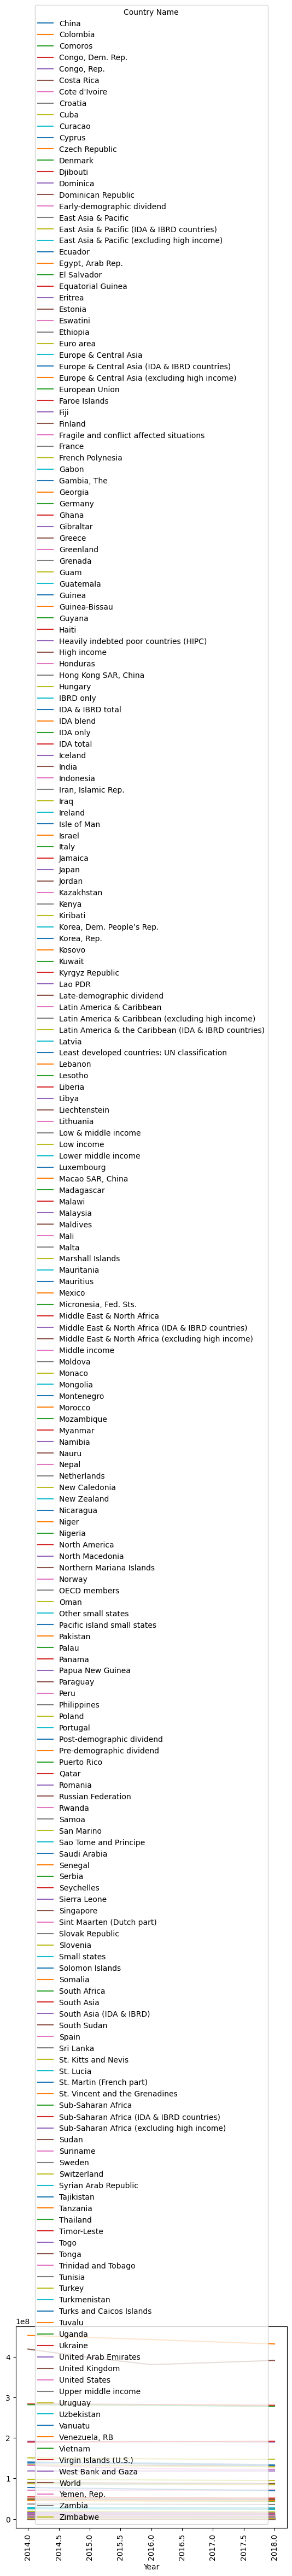

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name','Year'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] / gdp_pop['Pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'Year', 'Country Name')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('Year > 2013')
# and Country Name == "India" ')
# and Year >= 2013')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)


##**Unpivot with .melt()**

* id_vars['col1', 'col2'] - identifier variables (non-changing columns)

* value_vars ['col3', 'col4'] - control the columns to be unpivoted

* var_name =

* value_name =

* df_tall = df_wide.melt(id_vars=['col1', 'col2'], value_vars =['col3', 'col4'], var_name = 'xxx', value_name = 'yyy')



#**INTRODUCTION TO NUMPY**

##**Create NumPy 1D and 2D arrays from python list**

* 1D array - pass list to np.array
* 2D array - pass list of lists to np.array
* python list can hold different data types
* np array can hold single data type only

###**Create NumPy array**
* np.zeroes()
* np.random.random()
* np.arange()



In [ ]:
#  Create 1D array

#  Import NumPy
import numpy as np

# Create list
python_list =[1, 2, 3, 4, 5]

#  Create 1D numpy array
array = np.array(python_list)

print(array)
print(type(array))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [ ]:
#  Create 2D array

#  Import NumPy
import numpy as np

# Create list of lists
python_list_of_lists =[[1, 2, 3, 4, 5],
                       [6, 7, 8, 9, 10],
                       [11, 12, 13, 14, 15]]

#  Create numpy array
array = np.array(python_list_of_lists)

print(array)
print(type(array))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
<class 'numpy.ndarray'>


In [ ]:
#  Create 2D and 1D arrays from np.zeros
print(np.zeros((3, 5)))
print(np.zeros(5))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0.]


In [ ]:
#  Create 2D and 1D arrays from np.random.random
print(np.random.random((4, 2)))
print(np.random.random((4)))

[[0.17776322 0.07136487]
 [0.12968734 0.53731723]
 [0.44532274 0.43476262]
 [0.61914558 0.11916463]]
[0.41936154 0.81049571 0.76294698 0.06719987]


[-3 -2 -1  0  1  2  3]
[0 1 2 3 4]
[-3 -1  1]


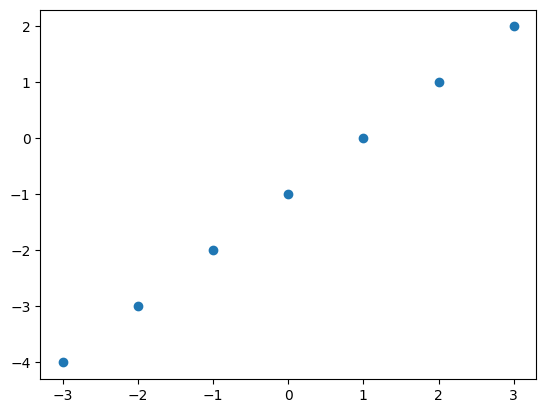

In [ ]:
#  Create 1D arrays from np.arange (evenly spaced numbers)
#  Start value included - stop value not included
#  Can be ignored if start is 0
#  Gives sequential numbers - can be changed with step argument
print(np.arange(-3, 4))
print(np.arange(5))
print(np.arange(-3, 3, 2))

#  useful for plotting
from matplotlib import pyplot as plt
plt.scatter(np.arange(-3, 4), np.arange(-4, 3))

##**3D arrays**
* create list of lists of lists
* alternatively, create array of 2D arrays




In [ ]:
#  Create 3D array from list of list of lists
import numpy as np
list_of_list_of_lists = [[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]]
array = np.array(list_of_list_of_lists)
print(array)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]


In [ ]:
#  Create 3D array from 2D arrays
array_1_2d = np.array([[1, 2, 3], [4, 5, 6]])
array_2_2d = np.array([[7, 8, 9], [10, 11, 12]])
array_3_2d = np.array([[13, 14, 15], [17, 18, 19]])
array = np.array([array_1_2d, array_2_2d, array_3_2d])
print(array)
print(array.shape)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [17 18 19]]]
(3, 2, 3)


##**Array Dimentionality**
* 1D array - no demension (horizontal or vertical)
* 2D array - rows 1st demension - columns 2nd dimension
* 3D array - 2D arrays with the same shape stacked on top of each other
* 4D array - 2D array filled with 3D arrays
* mathematics- 2D array is called a matrix
* mathematics - 3 or more dimensions is called a tensor

In [ ]:
#  Create 4D array with shape 2, 3, 4, 5
#  2 sets of 3 arrays - within each array there are 4 rows and 5 columns.
fourd_array = np.zeros((2, 3, 4, 5))
print(fourd_array)
print(fourd_array.shape)

[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]]
(2, 3, 4, 5)


##**Shapeshifting**

###**Array attributes**
* .shape

###**Array methods**
* .flatten()
* .reshape()





In [ ]:
#  Flatten array
array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#  Reshape array
import numpy as np
array = np.array([[1, 2], [4, 5], [7, 8]])
print(array.shape)
reshaped_array = array.reshape((2, 3))
print(reshaped_array.shape)


(3, 2)
(2, 3)


##**NumPy Data Types**

* more specific than Python

###**Bits and Bytes**
* bit - binary digit - only values of 0 or 1 - smallest unit of memory
* byte - sequence of 8 bits
* NumPy 32-bit integer - 2 to the 32nd power numbers - over four billion integers,

* np.int64
* np.int32 - -2.1B to +2.5B
* np.float64
* np.float32 -2.1B to + 2.1B
* np.bool
* np.U12 - '<U12'

###**Specify and change datatype of array**
* dtype =
* .astype()
* type coercion if more than 1 dtype in array

In [ ]:
# Create an array of zeros with three rows and two columns
zero_array = np.zeros((3, 2))

# Print the data type of zero_array
print(zero_array.dtype)

# Create a new array of int32 zeros with three rows and two columns
zero_int_array = np.zeros((3, 2), dtype=np.int32)

# Print the data type of zero_int_array
print(zero_int_array.dtype)


float64
int32


In [ ]:
print(np.array([34.65, 9, 7.8]).astype(np.int64).dtype)

int64


##**Indexing, Slicing and Sorting Arrays**

* [ ]
* 0 based indexing
* last index not included
* can use :

###**Index and Slice**
* Index 1D array - array[index_no]
* Slice 1D array - array[element:element]
* Index 2D array - array[row, column] - 1 index asumes its for row
* Slice 2D array - array[row_start:row_stop, column_start:column_stop]
* Slice 2D array with step value


###**Sort**

* np.sort - sort array along given axis
* 2D array - y_axis = axis 0 | x_axis = axis 1



In [ ]:
#  Index 1D array

#  Import NumPy
import numpy as np

# Create array
oneD_array =np.array(['a', 'b', 'c', 'd', 'e'], dtype= '<U5')

# Print dtype
print(oneD_array.dtype)

# Access 3rd element
print(oneD_array[2])

# Access elemnents 3-4 'c', 'd'
print(oneD_array[2:4])

<U5
c
['c' 'd']


In [ ]:
#  Index 2D array

#  Import NumPy
import numpy as np

# Create array
twoD_array =np.array([[1, 2, 3, 4, 5],
                       [6, 7, 8, 9, 10],
                       [11, 12, 13, 14, 15],
                      [16, 17, 18, 19, 20],
                       [21, 22, 23, 24, 25]])

# Access 2nd row 3rd column
print(twoD_array[1, 2])

# Access 2nd row only
print(twoD_array[1])

# Access row 2-4 columns 3-5
print(twoD_array[1:4, 2:5])

# Access row 2-4 columns 3-5 - steps 2 (corner values)
print(twoD_array[1:4:2, 2:5:2])

# Access row 2-4 columns 3-5 - steps 2 (for rows only)
print(twoD_array[1:4:2, 2:5])

8
[ 6  7  8  9 10]
[[ 8  9 10]
 [13 14 15]
 [18 19 20]]
[[ 8 10]
 [18 20]]
[[ 8  9 10]
 [18 19 20]]


In [ ]:
# Create array
twoD_array =np.array([[1, 3, 4, 88, 21],
                       [88, 7, 8, 100, 21],
                       [25, 12, 13, 14, 15],
                      [45, 17, 2, 19, 20],
                       [100, 22, 23, 24, 25]])

# Sort array along columns - default = axix = 0
print(np.sort(twoD_array))


# Sort array along rows
print(np.sort(twoD_array, axis=1))

# Sort array along 3rd column
print(np.sort(twoD_array[:, 2]))

[[  1   3   4  21  88]
 [  7   8  21  88 100]
 [ 12  13  14  15  25]
 [  2  17  19  20  45]
 [ 22  23  24  25 100]]
[[  1   3   4  21  88]
 [  7   8  21  88 100]
 [ 12  13  14  15  25]
 [  2  17  19  20  45]
 [ 22  23  24  25 100]]
[ 2  4  8 13 23]


##**Filtering Arrays**

###**Masks and fancy indexing**
* returns array of elements
* create boolean mask of same size
* index array using mask**


###**np.where()**
* returns array of indices
* tuple of indices as each element can be located only with index for each dimension
* can find and replace elements based on where condition



In [ ]:
#  2D fancy indexing - which classrooms have even number students

classroom_ids_and_sizes = np.array([[1,22], [2, 21], [3, 27], [4, 26]])

mask = classroom_ids_and_sizes[:, 1] % 2 == 0

#  use mask to filter column indices
print(classroom_ids_and_sizes[:, 0][mask])

#  use mask to filter array
print(classroom_ids_and_sizes[mask])

[1 4]
[[ 1 22]
 [ 4 26]]


In [ ]:
#  np.where() - which classrooms have even number students

classroom_ids_and_sizes = np.array([[1,22], [2, 21], [3, 27], [4, 26]])

print(np.where(classroom_ids_and_sizes[:, 1] % 2 == 0))


#  np.where () - 2D array
twoD_array =np.array([[1, 3, 4, 88, 21],
                       [88, 7, 8, 100, 21],
                       [25, 12, 13, 14, 15],
                      [45, 17, 2, 19, 20],
                       [100, 22, 23, 24, 25]])

row_ind, column_ind = np.where(twoD_array > 80)
print(row_ind, column_ind)

#  np.where () - find and replace with empty string for original array
print(np.where(twoD_array % 2 == 0, '', twoD_array))

#  np.where () - find and replace with 200 if condition ie met and 100 otherwise
print(np.where(twoD_array % 2 == 0, 100, 200))

(array([0, 3]),)
[0 1 1 4] [3 0 3 0]
[['1' '3' '' '' '21']
 ['' '7' '' '' '21']
 ['25' '' '13' '' '15']
 ['45' '17' '' '19' '']
 ['' '' '23' '' '25']]
[[200 200 100 100 200]
 [100 200 100 100 200]
 [200 100 200 100 200]
 [200 200 100 200 100]
 [100 100 200 100 200]]


##**Adding and Removing Data**

* np.concat() - add data to an array on any given axis
* default = add along first axis (row)




In [2]:
#  Concatenane arrays
import numpy as np

classroom_ids_and_sizes = np.array([[1,22], [2, 21], [3, 27], [4, 26]])

new_classroom = np.array([[5, 30], [5, 17]])

np.concatenate((classroom_ids_and_sizes, new_classroom))

array([[ 1, 22],
       [ 2, 21],
       [ 3, 27],
       [ 4, 26],
       [ 5, 30],
       [ 5, 17]])